<a href="https://colab.research.google.com/github/MustafaGurbuz/ArtificleIntelligence/blob/master/CNNRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

veri = pd.read_csv("/content/drive/My Drive/YZHomeWork/telefon_fiyat_değişimi.csv")

label_encoder = LabelEncoder().fit(veri.price_range)
labels = label_encoder.transform(veri.price_range)
classes = list(label_encoder.classes_)

X = veri.drop(["price_range"],axis=1)
y=labels

nb_features=20
nb_classes=len(classes)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = np.array(X_train).reshape(1000,20,1)
X_test = np.array(X_test).reshape(1000,20,1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Flatten, SimpleRNN, BatchNormalization

model = Sequential()
model = Sequential()
model.add(Conv1D(1024,1,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Conv1D(512,1))
model.add(MaxPooling1D(1))
model.add(Conv1D(128,1))
model.add(MaxPooling1D(2))
model.add(SimpleRNN(1024,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(Dropout(0.30))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2018,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(nb_classes,activation="sigmoid"))
model.summary()

from tensorflow.keras.optimizers import SGD

opt = SGD(lr=1e-3, decay=1e-3, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer = opt, metrics=["accuracy"])
score = model.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 20, 1024)          2048      
_________________________________________________________________
activation_4 (Activation)    (None, 20, 1024)          0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 10, 1024)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 512)           524800    
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 10, 512)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 10, 128)           65664     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 5, 128)           

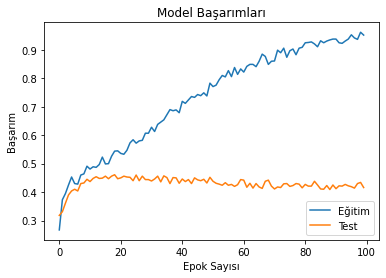

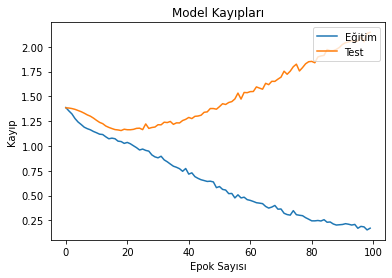

In [7]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Başarımları")
plt.xlabel("Epok Sayısı")
plt.ylabel("Başarım")
plt.legend(["Eğitim","Test"], loc="lower right")
plt.show()

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Kayıpları")
plt.xlabel("Epok Sayısı")
plt.ylabel("Kayıp")
plt.legend(["Eğitim","Test"], loc="upper right")
plt.show()